In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Загрузка данных
mvid = pd.read_csv('data/MVID_101001_171001.txt')
sber = pd.read_csv('data/SBER_101001_171001.txt')

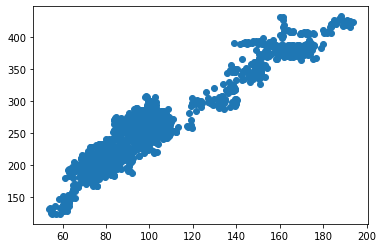

In [3]:
# Объединение данных по дате
res = pd.merge(sber, mvid, on='<DATE>')

# Удаление ненужных столбцов
res = res[['<CLOSE>_x', '<CLOSE>_y']]

# Переименование столбцов
res.columns = ['x', 'y']

# Построение начального графика
plt.figure()
plt.scatter(res['x'], res['y'])
plt.show()

In [4]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def BGD(self, X, Y, alpha=0.00005, accuracy=0.0001, max_steps=1000):
        steps, errors = [], []
        step = 0
        old_err = self.error(X, Y)
        new_err = self.error(X, Y) - 1
        dJ = 1
        while (dJ > accuracy) and (step < max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            old_err = new_err
            new_err = self.error(X, Y)
            dJ = abs(old_err - new_err)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

# Создание объекта модели
hyp = hypothesis()

In [5]:
# Вывод предсказания для x=0 и x=100
print(hyp.predict(0))
print(hyp.predict(100))

0
0


In [6]:
# Вычисление начальной ошибки
J = hyp.error(res['x'], res['y'])
print("Initial error:", J)

Initial error: 36271.58344889084


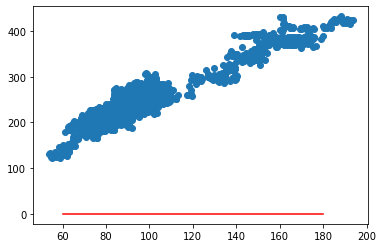

In [7]:
# Построение графика модели до градиентного спуска
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(res['x'], res['y'])
plt.plot(X0, Y0, 'r')
plt.show()

In [8]:
# Применение градиентного спуска и вычисление ошибки после него
hyp.BGD(res['x'], res['y'])
J = hyp.error(res['x'], res['y'])
print("Error after gradient descent:", J)

Error after gradient descent: 297.7449941931432


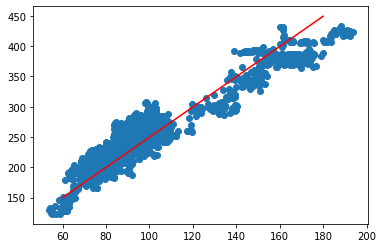

In [9]:
# Построение графика модели после градиентного спуска
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(res['x'], res['y'])
plt.plot(X0, Y0, 'r')
plt.show()

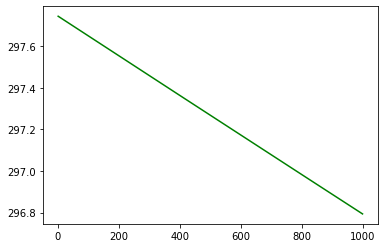

In [10]:
# Построение кривых обучения
steps, errors = hyp.BGD(res['x'], res['y'])
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()